In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris , load_breast_cancer, load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Perceptron

In [ ]:
X,y = make_classification(n_samples = 100 , n_features = 2, n_redundant = 0,hypercube = True, class_sep = 1.5, shuffle = True , random_state = 44)
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 24)

1.0
[1. 1.]
0.75
0.99
[0.94112028 1.0137798 ]
0.8
0.8699999999999999
[0.65977266 1.1464782 ]
0.8
0.8499999999999999
[0.44834303 1.18098706]
0.85
0.7599999999999998
[0.06022578 1.20502027]
0.95
0.7299999999999998
[0.03265508 1.2287531 ]
0.95
0.6799999999999997
[-0.12338996  1.17575903]
0.95
0.49999999999999956
[-0.25369948  1.23869657]
0.95


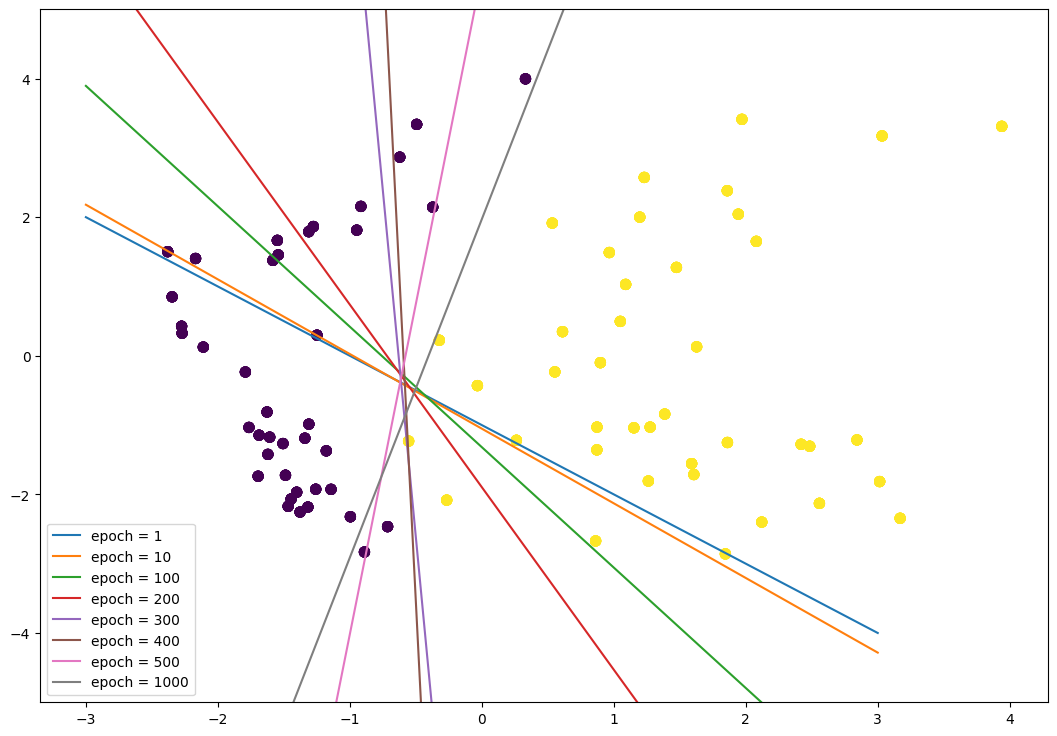

In [ ]:

class Perceptron:
  def __init__(self,lr = 0.01,epoch =100):
    self.lr = lr
    self.epoch = epoch

  def fit(self, X_train, y_train):
    X_train = np.insert(X_train,0,1,axis = 1)
    theta = np.ones(X_train.shape[1])

    for i in range(self.epoch):
      id = np.random.randint(0,X_train.shape[0])
      rho  = np.dot(X_train[id], theta)
      y_hat = self.cap(rho)

      theta += self.lr * (y_train[id] - y_hat) * X_train[id]

    self.intercept = theta[0]
    self.coef = theta[1:]

    print(self.intercept)
    print(self.coef)

  def cap(self,z):
    return 1 if z>0 else 0

  def predict(self, X_test):
    rho = np.dot(X_test, self.coef) + self.intercept
    for i in range(rho.shape[0]):
      rho[i] = 1 if rho[i]>0 else 0
    return rho

plt.figure(figsize = [13,9])

for i in [1,10,100,200,300,400,500, 1000]:

   md = Perceptron(lr = 0.01, epoch = i)
   md.fit(X_train, y_train)
   print(accuracy_score(y_test, md.predict(X_test)))

   m = -(md.coef[1]/md.coef[0])
   b = -(md.intercept/md.coef[0])

   x_plot = np.linspace(-3,3,100)
   y_plot = m * x_plot + b

   plt.plot(x_plot, y_plot, label = 'epoch = {0}'.format(i))
   plt.scatter(X_train[:,1], X_train[:,0], c = y_train, s=50)
   plt.ylim(-5,5)

plt.legend()
plt.show()


[0.49939874]
[[-0.37655849  2.74945621]]
0.95


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

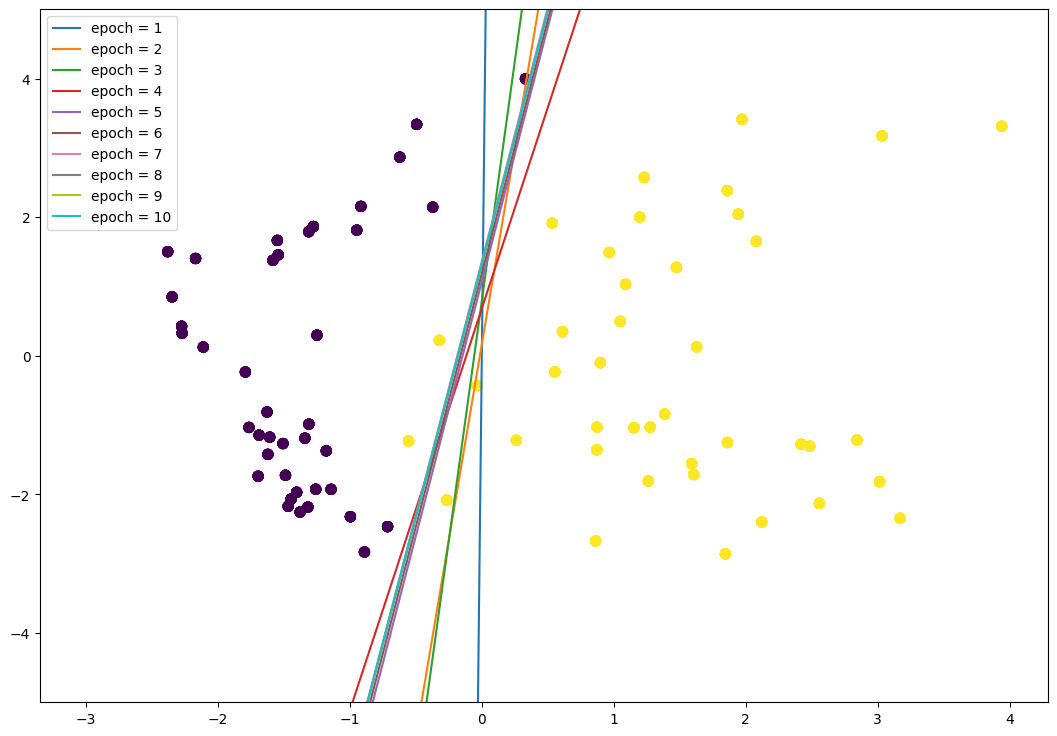

In [ ]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
print(logReg.intercept_)
print(logReg.coef_)
print(accuracy_score(y_test, y_pred))

plt.figure(figsize = [13,9])

for i in [1,2,3,4,5,6,7,8,9,10]:

   md = LogisticRegression(max_iter = i)
   md.fit(X_train, y_train)

   m = -(md.coef_[0,1]/md.coef_[0,0])
   b = -(md.intercept_/md.coef_[0,0])

   x_plot = np.linspace(-3,3,100)
   y_plot = m * x_plot + b

   plt.plot(x_plot, y_plot, label = 'epoch = {0}'.format(i))
   plt.scatter(X_train[:,1], X_train[:,0], c = y_train, s=50)
   plt.ylim(-5,5)

plt.legend()
plt.show()


#Logistic Regression

In [ ]:
# X,y = make_classification(n_samples = 100 , n_features = 2, n_redundant = 0,hypercube = True, class_sep = 1.5, shuffle = True , random_state = 44)
X,y = load_breast_cancer(return_X_y = True)
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 344)

In [ ]:
class GD_LogisticRegressor:
  def __init__(self,lr = 0.01, epoch = 100):
    self.lr = lr
    self.epoch = epoch

  def sigmoid(self,z):
    return 1/(1+ np.exp(-z))

  def fit(self, X_train, y_train):
    X_train = np.insert(X_train, 0,1,axis = 1)
    theta = np.random.random(X_train.shape[1])

    for i in range(self.epoch):
      y_hat = self.sigmoid( np.dot(X_train, theta) )

      diff = np.dot(X_train.T , (y_train - y_hat))/X_train.shape[0]
      theta += self.lr * diff

    self.intercept = theta[0]
    self.coef = theta[1:]

    print(self.intercept)
    print(self.coef)

  def predict(self, X_test):
    res =  self.sigmoid(np.dot(X_test,self.coef)+ self.intercept)
    res = (res>0.5).astype(int)
    return res

md = GD_LogisticRegressor(lr = 0.01, epoch = 1000)
md.fit(X_train,y_train)
y_pred = md.predict(X_test)
print(accuracy_score(y_test, y_pred))


# plt.figure(figsize = [13,9])

# for i in [1,500,1000,5000,10000]:

#    md = GD_LogisticRegressor(lr = 0.01, epoch = i)
#    md.fit(X_train, y_train)

#    m = -(md.coef[1]/md.coef[0])
#    b = -(md.intercept/md.coef[0])

#    x_plot = np.linspace(-3,3,100)
#    y_plot = m * x_plot + b

#    plt.plot(x_plot, y_plot, label = 'epoch = {0}'.format(i))
#    plt.scatter(X_train[:,1], X_train[:,0], c = y_train, s=50)
#    plt.ylim(-5,5)

# plt.legend()
# plt.show()




1.058127281526851
[  3.66101245   4.53867627  17.36264161   7.0916538    0.7822801
   0.88789958   0.47340644   0.46729352   0.83182263   0.31052512
   0.18484921   0.96980599   0.16226768  -5.95711661   0.2793183
   0.17355511   0.94444686   0.29219088   0.73314474   0.60133653
   3.20088831   5.72093591  17.83478928 -10.58827255   0.23621389
   0.58285783   0.79184671   0.45058709   0.84021959   0.07479668]
0.8947368421052632


<ipython-input-24-abba39eb4e06>:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-z))


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(lr.intercept_)
print(lr.coef_)
print(accuracy_score(y_test,y_pred))
# plt.figure(figsize = [13,9])

# m = -(lr.coef_[0,1]/lr.coef_[0,0])
# b = -(lr.intercept_/lr.coef_[0,0])

# x_plot = np.linspace(-3,3,100)
# y_plot = m * x_plot + b

# plt.plot(x_plot, y_plot, color = 'red')
# plt.scatter(X_train[:,1], X_train[:,0] , c = y_train , s = 50 )

# plt.ylim(-5,5)

# plt.legend()
# plt.show()



[0.22087451]
[[ 1.19692652  0.46238758  0.20334315 -0.01317937 -0.04535006 -0.21817011
  -0.30962393 -0.12810215 -0.05334996 -0.01436211  0.05344819  0.53892088
   0.32132239 -0.126167   -0.00382538 -0.04688596 -0.06734084 -0.01673472
  -0.01605404 -0.00452732  1.22240572 -0.57206514 -0.22087223 -0.01800879
  -0.08377739 -0.70806736 -0.878437   -0.25127562 -0.19521424 -0.07087803]]
0.9473684210526315


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#SoftMax

In [ ]:
# X,y  = make_classification(n_samples= 300 , n_features = 2,n_informative = 2 ,n_redundant= 0, n_classes = 3, n_clusters_per_class= 1, random_state =64)
# X,y = load_iris(return_X_y = True)
# X,y = load_breast_cancer(return_X_y = True)
X, y = load_digits(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =345)

In [ ]:
def graph(theta):
    plt.figure(figsize = [13,9])
    for i in range(md.theta.shape[0]):
      m = -(theta[i,2]/theta[i,1])
      b = -(theta[i,0]/theta[i,1])

      x_plot = np.linspace(-3,3,100)
      y_plot = m * x_plot + b

      plt.plot(x_plot, y_plot, label = "w{0}".format(i))


    plt.scatter(X_train[:,0], X_train[:,1], c = y_train )


    plt.ylim(-4,4)
    plt.legend()
    plt.show()

0.027683322420164524
[[9.72140256e+00 3.60377470e-01 1.82300556e+00 6.98993519e+01
  2.19327730e+02 1.89104069e+02 4.86645584e+01 2.27711477e+00
  1.94144105e+00 6.17839778e-01 1.42992740e+01 2.06311807e+02
  2.19963011e+02 1.89190570e+02 1.92106029e+02 1.68991544e+01
  4.88168263e-01 5.76970651e-01 6.17115716e+01 2.33855837e+02
  8.57355747e+01 3.63032252e+01 2.04994782e+02 6.06337795e+01
  2.19082333e+00 1.18714574e+00 8.63168809e+01 2.10444342e+02
  3.57690353e+01 5.38835622e+00 1.53871706e+02 1.05536297e+02
  2.08058294e+00 5.67425856e-01 9.86526007e+01 1.93938699e+02
  1.71782429e+01 1.82536816e+00 1.49343602e+02 1.18343364e+02
  3.70300182e-01 6.57498290e-01 5.91865665e+01 2.20868187e+02
  3.05755934e+01 2.96526653e+01 1.89721496e+02 9.66569546e+01
  2.02969018e+00 1.53993889e+00 1.48479713e+01 2.18292516e+02
  1.67549508e+02 1.75134424e+02 2.20686694e+02 3.79984764e+01
  3.49249045e-01 2.30979296e+00 1.08287183e+00 7.24181108e+01
  2.25333904e+02 2.21733339e+02 8.86285871e+01 6.

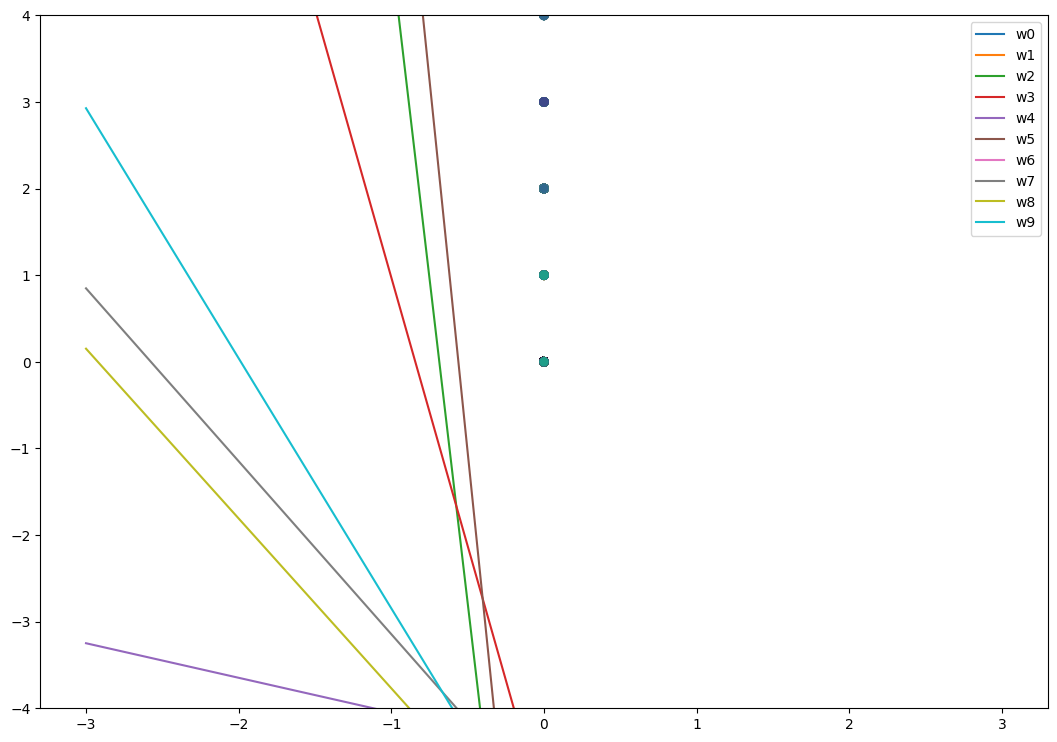

In [ ]:
class softmax:
  def __init__(self, lr = 0.01 , epoch = 100, alpha = None):
    self.lr = lr
    self.epoch = epoch
    self.alpha = alpha

  def softmax(self,z):
    z -= np.max(z)
    return  (np.exp(z) / np.sum(np.exp(z)))

  def ohe(self, y):
    res = np.zeros([y.shape[0],self.n_classes])
    res[np.arange(y.shape[0]), y] = 1
    # print(np.sum(res,axis = 0))
    return res

  def fit(self, X_train , y_train):

    self.n_classes = np.unique(y_train).shape[0]

    y_train = self.ohe(y_train)

    if(self.alpha is not None):
        n = X_train.shape[1]

        self.theta = np.random.random([self.n_classes,n])
        self.intercept = np.random.random([self.n_classes,1])

        for i in range(self.epoch):
          # print(X_train.shape, self.theta.shape)
          y_hat = self.softmax(X_train @ self.theta.T + self.intercept.T)

          grad_theta = 1/X_train.shape[0] * ((y_train - y_hat).T @ X_train) +  self.alpha * self.theta
          grad_intercept = (1/X_train.shape[0]) * (np.sum((y_train - y_hat), axis = 0)).reshape(self.n_classes,1)

          self.theta += self.lr * grad_theta
          self.intercept += self.lr * grad_intercept

    else:
        X_train = np.insert(X_train,0,1,axis=1)
        n = X_train.shape[1]
        self.theta = np.random.random([self.n_classes,n])
        for i in range(self.epoch):
          y_hat = self.softmax(X_train @ self.theta.T)

          grad_theta = 1/X_train.shape[0] * ((y_train - y_hat).T @ X_train)

          self.theta += self.lr * grad_theta



  def predict(self, X_test):
    y = 0

    if( self.alpha is not None):
        pred = self.softmax(X_test @ self.theta.T + self.intercept.T)
        y = np.argmax(pred, axis = 1)
    else:
        X_test = np.insert(X_test, 0,1, axis =1)
        pred = self.softmax(X_test @ self.theta.T)
        y = np.argmax(pred, axis = 1)

    return y

md = softmax(lr = 0.1, epoch = 1000)
md.fit(X_train, y_train)
y_pred = md.predict(X_test)
print(f1_score(y_test, y_pred, average = "weighted"))

if(md.alpha is not None):
    theta = np.hstack([md.intercept.reshape(md.theta.shape[0], 1), md.theta])
    print(theta)
    graph(theta)
else:
    print(md.theta)
    graph(md.theta)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-58-3916ab91b215>:4: RuntimeWarning: divide by zero encountered in scalar divide
  m = -(theta[i,2]/theta[i,1])
<ipython-input-58-3916ab91b215>:5: RuntimeWarning: divide by zero encountered in scalar divide
  b = -(theta[i,0]/theta[i,1])
<ipython-input-58-3916ab91b215>:8: RuntimeWarning: invalid value encountered in add
  y_plot = m * x_plot + b


[[ 1.56760298e-03  0.00000000e+00 -8.44683774e-03 -4.59445634e-02
   1.41284542e-01  2.32025525e-02 -1.28710526e-01 -9.50332220e-02
  -8.40108051e-03 -1.15648418e-04 -7.64361499e-02 -3.36549988e-02
   1.37602654e-01  5.99712587e-02  1.18158659e-01 -1.93650942e-02
  -7.94337344e-03 -2.84052754e-04  2.10400761e-02  1.49295170e-01
  -6.30965964e-04 -3.21643359e-01  1.51014294e-01  9.83352021e-02
  -2.75062701e-03 -1.27687757e-04  1.40138905e-01  9.87721886e-02
  -1.76076568e-01 -4.69787118e-01  5.04769755e-02  6.79554329e-02
  -4.39076274e-04  0.00000000e+00  1.62264947e-01  1.20360686e-01
  -2.29548966e-01 -4.02888199e-01  1.83802609e-02  4.43056389e-02
   0.00000000e+00 -9.38068656e-04  2.77957572e-03  2.59662431e-01
  -1.11766783e-01 -1.31529159e-01  1.12122649e-01  2.01892552e-02
  -6.34888571e-04 -3.23638210e-03 -9.73363969e-02  9.28148936e-02
   1.86984525e-02  7.86458953e-02  1.18977804e-01 -7.04319758e-02
  -1.25062562e-02 -1.60538821e-05 -5.81678980e-03 -8.75944896e-02
   1.45108

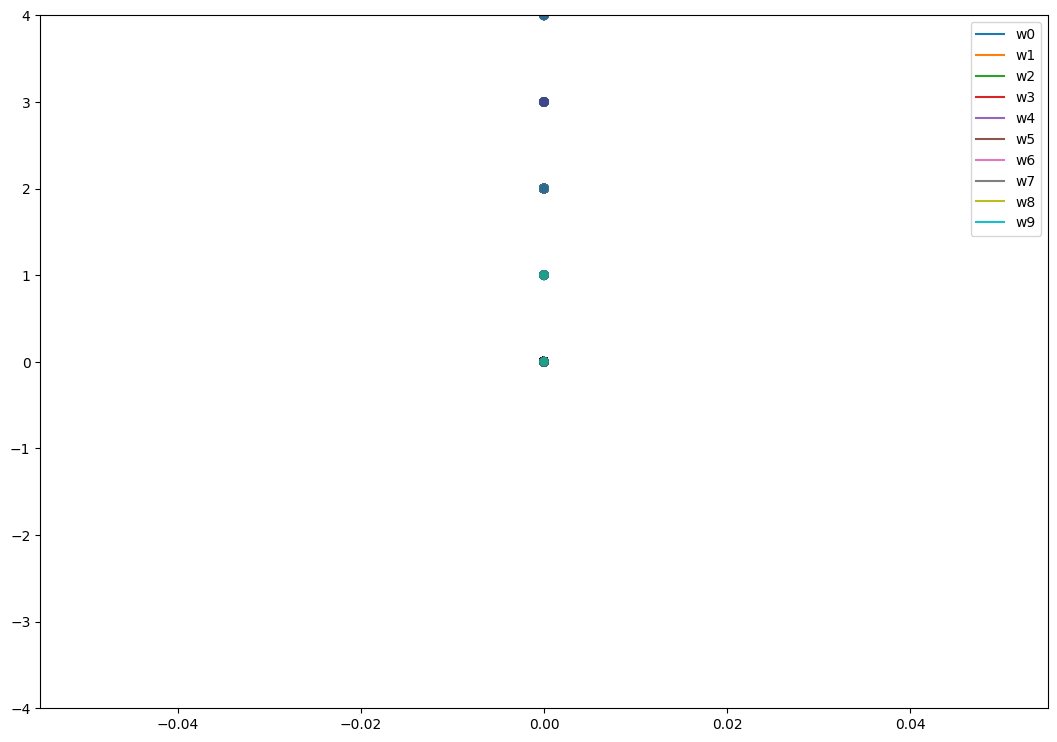

In [ ]:
soft = LogisticRegression( multi_class = "multinomial" )
soft.fit(X_train, y_train)
y_pred = soft.predict(X_test)

theta = np.hstack([soft.intercept_.reshape(soft.coef_.shape[0], 1), soft.coef_])
print(theta)
print(f1_score(y_test, y_pred, average = "weighted"))
graph(theta)